Diabetes Dataset X One Hot Endcode (Dummy Var)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
data = pd.read_csv(f'dataset//diabetes_dataset.csv')
data = data.drop(columns=["Alcohol_Consumption","Unnamed: 0"])

In [3]:
data.head(5)

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Current,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

In [5]:
from sklearn.preprocessing import OneHotEncoder


In [6]:
def encode(data,name_feature):
    pass

In [83]:
ohe1 = OneHotEncoder(sparse_output=False,drop="first")
new_sex = ohe1.fit_transform(data[["Sex"]])
new_column = pd.DataFrame(new_sex,columns=["Sex"])
new_column

,Sex
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [8]:
data = pd.concat([data.drop(columns=["Sex"]),new_column],axis=1)

In [9]:
data.columns

Index(['Age', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes', 'Sex'],
      dtype='object')

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedGroupKFold
#model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

In [14]:
data2 = pd.read_csv(f'dataset//diabetes_dataset.csv')
data2 = data2.drop(columns=["Unnamed: 0"])
data2.head(5)

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [49]:
col_trans = make_column_transformer((OneHotEncoder(sparse_output=False,drop="first"),['Sex']),
                                    (OneHotEncoder(sparse_output=False,drop="first"),["Ethnicity"]),
                                    (OneHotEncoder(sparse_output=False,drop="first"),["Physical_Activity_Level"]),
                                    (OneHotEncoder(sparse_output=False,drop="first"),["Alcohol_Consumption"]),
                                    (OneHotEncoder(sparse_output=False,drop="first"),["Smoking_Status"]),
                                    remainder='passthrough')
col_trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder-1',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Sex']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Ethnicity']),
                                ('onehotencoder-3',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Physical_Activity_Level']),
                                ('onehotencoder-4',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Alcohol_Consumption']),
                                ('onehotencoder-5',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Smoking_Status'])])

In [55]:
from sklearn.ensemble import RandomForestRegressor
new_model = RandomForestRegressor()


In [56]:
pipe = make_pipeline(col_trans,new_model)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Sex']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Ethnicity']),
                                                 ('onehotencoder-3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Physical_Activity_Level']),
                                                 ('onehotencoder-4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Alcohol_Consumption']),
                                                 ('onehotencoder-5',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Smoking_Status'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [57]:
data2.columns

Index(['Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [60]:
X = data2.drop(columns=['HbA1c','Fasting_Blood_Glucose'])
y = data2['Fasting_Blood_Glucose']
X

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,Female,Asian,39.4,114.0,109,82,187.7,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,41,Female,Asian,21.0,71.3,154,72,234.3,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,50,Female,Asian,29.0,106.3,122,61,266.0,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,62,Female,White,27.3,119.9,99,115,172.3,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


In [61]:
accuracy = cross_val_score(pipe,X,y,cv=10)
print(accuracy)

[-0.00487248 -0.01210146 -0.03146614 -0.01400786 -0.03288685 -0.01335567
 -0.02035176 -0.02418129 -0.03204693 -0.01537782]


In [65]:
data2.columns

Index(['Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
x = data2.drop(columns=['Sex','Ethnicity','Physical_Activity_Level','Alcohol_Consumption','Smoking_Status','Fasting_Blood_Glucose', 'HbA1c'])
X_scaled = scaler.fit_transform(x)




<Axes: >

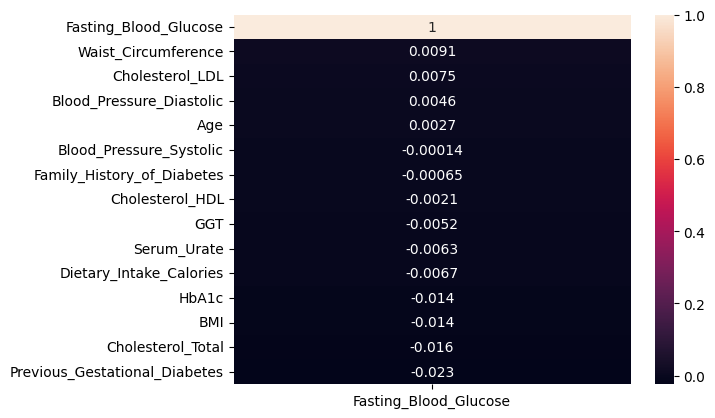

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data2.corr(numeric_only=True)  # ใส่ numeric_only=True ใน pandas >= 2.0
sns.heatmap(corr[["Fasting_Blood_Glucose"]].sort_values(by="Fasting_Blood_Glucose", ascending=False), annot=True)


In [74]:
data2
data2['Outcome'] = ((data2['Fasting_Blood_Glucose'] >= 126) | (data2['HbA1c'] > 6.5)).astype(int)
data2

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Outcome
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,187.7,...,88.7,19.1,6.1,Low,3582,NaN,Former,1,1,1
9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,234.3,...,200.0,37.1,3.5,Low,2206,NaN,Never,1,1,1
9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,266.0,...,156.1,85.8,4.9,High,3175,Heavy,Former,1,1,0
9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,172.3,...,110.9,25.3,5.2,High,3478,Moderate,Never,1,0,1


<Axes: >

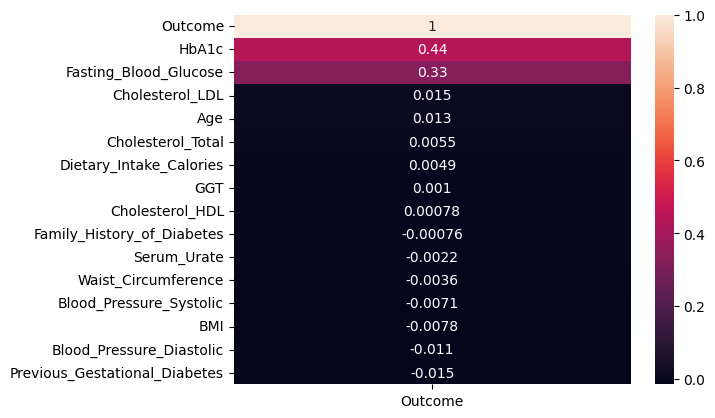

In [75]:
corr = data2.corr(numeric_only=True)  # ใส่ numeric_only=True ใน pandas >= 2.0
sns.heatmap(corr[["Outcome"]].sort_values(by="Outcome", ascending=False), annot=True)


In [115]:
data3 = data2.copy()
data3 

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Outcome
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,187.7,...,88.7,19.1,6.1,Low,3582,NaN,Former,1,1,1
9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,234.3,...,200.0,37.1,3.5,Low,2206,NaN,Never,1,1,1
9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,266.0,...,156.1,85.8,4.9,High,3175,Heavy,Former,1,1,0
9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,172.3,...,110.9,25.3,5.2,High,3478,Moderate,Never,1,0,1


In [116]:
from sklearn.feature_selection import RFE


In [117]:
non_num_col = data3.select_dtypes(exclude='number').columns
non_num_col

Index(['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption',
       'Smoking_Status'],
      dtype='object')

In [118]:
def encode(data,column_name):
    OneHot = OneHotEncoder(sparse_output=False,drop="first")
    new_transform = OneHot.fit_transform(data[[column_name]])
    new_column_name = OneHot.get_feature_names_out([column_name])
    new_column = pd.DataFrame(new_transform,columns=new_column_name,index=data.index)
    data = data.drop(columns=[column_name])
    data = pd.concat([data,new_column],axis=1)

    return data
data3.head(3)

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Outcome
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1


In [119]:
col_convert = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption',
       'Smoking_Status']
for i in col_convert:
    data3 = encode(data3,i)
data3.head(5)

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,...,Sex_Male,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Alcohol_Consumption_Moderate,Alcohol_Consumption_nan,Smoking_Status_Former,Smoking_Status_Never
0,58,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,48,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,34,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,62,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,27,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [121]:
random = RandomForestClassifier(n_estimators=100)
random_select = RFE(random,n_features_to_select=5,step=1)



In [124]:
x1 = data3.drop(columns=['Outcome'])
y = data3.Outcome

In [126]:
x_tr,x_t,y_tr,y_t = train_test_split(x1,y,test_size=0.2,random_state=42)


In [ ]:
random_select.fit(x_tr,y_tr)
predicted = random_select.predict(x_t)
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [129]:
def model_accurate_score(model_name,data_test,predicted):
    from sklearn.metrics import r2_score,mean_squared_error
    print(f"{model_name}")
    print(f"R2 Score :{round(r2_score(data_test,predicted),4)*100 } % **Remark Near 1 is the best")
    print(f"mean Square Error : {round(mean_squared_error(data_test,predicted),4)}")
    print("-"*10)

In [130]:
model_accurate_score("RandomForestClassifier",y_t,predicted)

RandomForestClassifier
R2 Score :100.0 % **Remark Near 1 is the best
mean Square Error : 0.0
----------


In [136]:
np.array(x_tr.columns)[random_select.support_]

array(['Fasting_Blood_Glucose', 'HbA1c', 'Cholesterol_Total',
       'Cholesterol_HDL', 'Dietary_Intake_Calories'], dtype=object)

<Axes: >

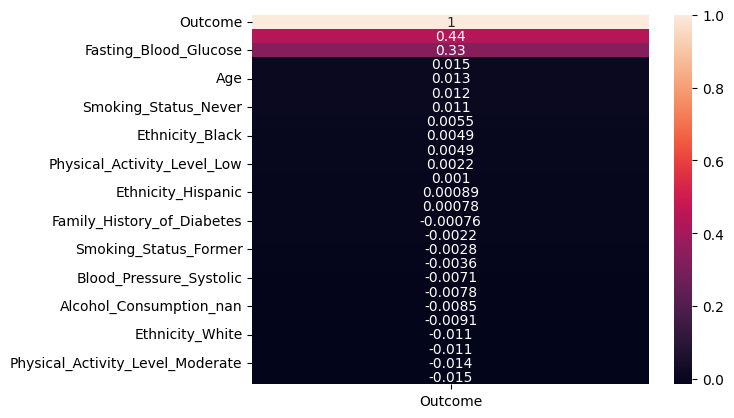

In [140]:
corr = data3.corr(numeric_only=True)
sns.heatmap(corr[["Outcome"]].sort_values(by="Outcome", ascending=False), annot=True)


In [143]:
col1 = data3[['Fasting_Blood_Glucose', 'HbA1c', 'Cholesterol_Total',
       'Cholesterol_HDL', 'Dietary_Intake_Calories']].copy()
col1

,Fasting_Blood_Glucose,HbA1c,Cholesterol_Total,Cholesterol_HDL,Dietary_Intake_Calories
0,123.9,10.9,197.8,50.2,1538
1,183.7,12.8,261.6,62.0,2653
2,142.0,14.5,261.0,32.1,1684
3,167.4,8.8,183.4,41.1,3796
4,146.4,7.1,203.2,53.9,3161
...,...,...,...,...,...
9995,76.2,13.4,187.7,60.3,3582
9996,77.1,12.9,234.3,72.3,2206
9997,97.5,4.9,266.0,69.8,3175
9998,89.0,11.5,172.3,74.2,3478
